# Reference

https://qiita.com/h-nabata/items/a17b41fd4e72b2855e8a

## ネットワークの作成

IGRAPH U--- 3 2 --
+ edges:
0--1 1--2


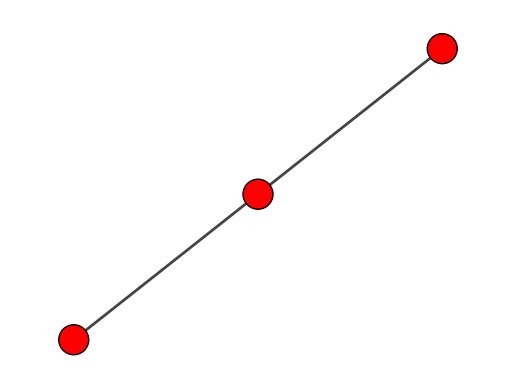

In [1]:
import matplotlib.pyplot as plt
import igraph

fig, ax = plt.subplots()

g = igraph.Graph()
g.add_vertices(3)
g.add_edges([(0,1), (1,2)])

print(g)

my_layout = g.layout_auto()
igraph.plot(g, layout = my_layout, target= ax)
plt.show()

## 頂点、辺、節点の追加

IGRAPH U--- 6 7 --
+ edges:
0--1 1--2 0--2 2--3 3--4 4--5 3--5


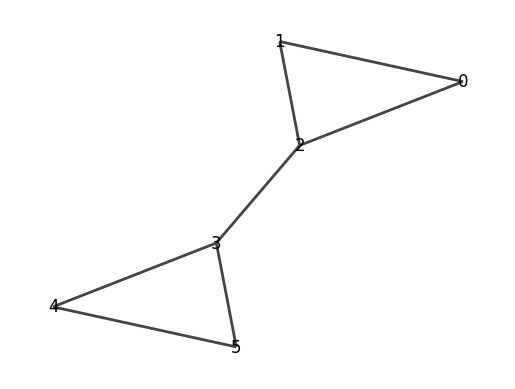

In [2]:
import matplotlib.pyplot as plt
import igraph

fig, ax = plt.subplots()

g = igraph.Graph()
g.add_vertices(3)
g.add_edges([(0,1), (1,2)])

# added
g.add_edges([(2, 0)])
g.add_vertices(3)
g.add_edges([(2, 3), (3, 4), (4, 5), (5, 3)])

print(g)

# specifing the plot style
visual_style ={
    "vertex_color": "yellow",
    "vertex_size":0.2,
    "vertex_label":[0,1,2,3,4,5]
}

my_layout = g.layout_auto()
igraph.plot(g, layout = my_layout, target= ax, **visual_style)
plt.show()

## 頂点、辺、節点の削除

IGRAPH U--- 6 7 --
+ edges:
0--1 1--2 0--2 2--3 3--4 4--5 3--5


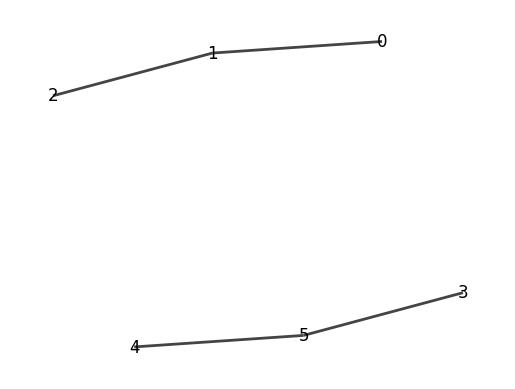

In [3]:
import matplotlib.pyplot as plt
import igraph

fig, ax = plt.subplots()

g = igraph.Graph()
g.add_vertices(3)
g.add_edges([(0,1), (1,2)])

g.add_edges([(2, 0)])
g.add_vertices(3)
g.add_edges([(2, 3), (3, 4), (4, 5), (5, 3)])

print(g)

visual_style ={
    "vertex_color": "yellow",
    "vertex_size":0.2,
    "vertex_label":[0,1,2,3,4,5]
}

# added
g.delete_edges([(0,2),(2,3),(3,4)])

my_layout = g.layout_auto()
igraph.plot(g, layout = my_layout, target= ax, **visual_style)
plt.show()

## ネットワークを確率的に生成する

IGRAPH U--- 100 550 -- 
+ attr: x (v), y (v)


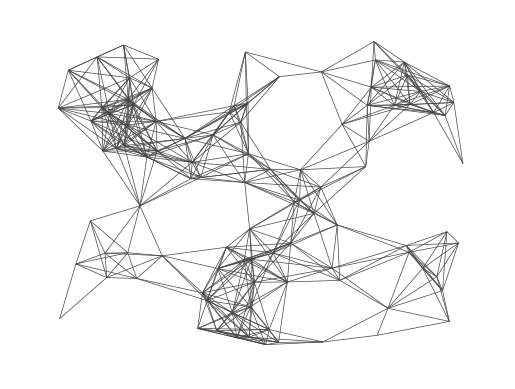

In [4]:
import matplotlib.pyplot as plt
import igraph

fig, ax = plt.subplots()

g = igraph.Graph()
g = igraph.Graph.GRG(100, 0.2)

igraph.summary(g)

visual_style ={
    "vertex_size":0.05,
    "edge_width":0.5
}

my_layout = g.layout_auto()
igraph.plot(g, layout = my_layout, target= ax, **visual_style)
plt.show()


## ネットワークをツリー状に生成する

0.11.8
IGRAPH U--- 100 99 -- 


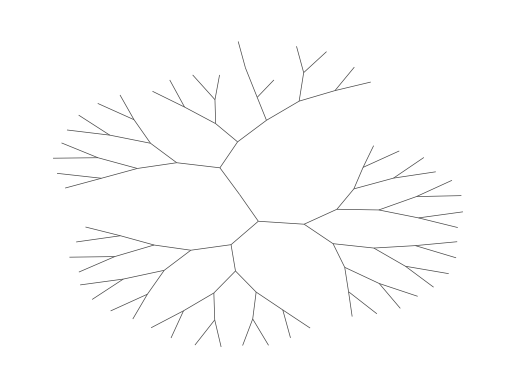

In [5]:
import matplotlib.pyplot as plt
import igraph

print(igraph.__version__)

fig, ax = plt.subplots()

g = igraph.Graph()
g = igraph.Graph.Tree(100, 2)

igraph.summary(g)

visual_style ={
    "vertex_size":0.5,
    "edge_width":0.5
}

my_layout = g.layout_auto()
igraph.plot(g, layout = my_layout, target= ax, **visual_style)
plt.show()

## 有向グラフの生成

Topological sort of g (out): 0 1 2 4 3 5
degree of 0: 0
degree of 1: 1
degree of 2: 1
degree of 3: 2
degree of 4: 1
degree of 5: 2


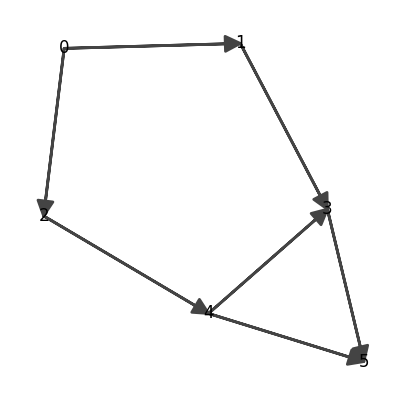

In [6]:
import matplotlib.pyplot as plt
import igraph

g = igraph.Graph(
    edges=[(0, 1), (0, 2), (1, 3), (2, 4), (4, 3), (3, 5), (4, 5)],
    directed=True,
)

assert g.is_dag
results = g.topological_sorting(mode='out')
print('Topological sort of g (out):', *results)

for i in range(g.vcount()):
    print('degree of {}: {}'.format(i, g.vs[i].indegree()))

fig, ax = plt.subplots(figsize=(5, 5))
igraph.plot(
        g,
        target=ax,
        vertex_size=0.4,
        edge_width=2,
        vertex_label=range(g.vcount()),
        vertex_color="white",
    )

plt.show()


## 重み付きグラフの生成

[1, 5, 8]
Shortest weighted distance is:  8


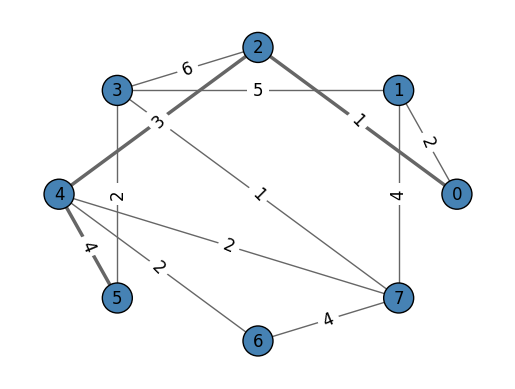

In [7]:
import matplotlib.pyplot as plt
import igraph


g = igraph.Graph(
    8,
    [(0, 1), (0, 2), (1, 3), (1, 7), (2, 3), (2, 4), (3, 5), (3, 7), (4, 5), (4, 6), (4, 7), (6, 7)]
)

# adding weights to the edges
g.es["weight"] = [2, 1, 5, 4, 6, 3, 2, 1, 4, 2, 2, 4]

results = g.get_shortest_paths(0, to=5, weights=g.es["weight"], output="epath")
print(*results)

if len(results[0]) > 0:
    # Add up the weights across all edges on the shortest path
    distance = 0
    for e in results[0]:
        distance += g.es[e]["weight"]
    print("Shortest weighted distance is: ", distance)
else:
    print("End node could not be reached!")

g.es['width'] = 1.0
g.es[results[0]]['width'] = 2.5

fig, ax = plt.subplots()
igraph.plot(
    g,
    target=ax,
    layout='circle',
    vertex_color='steelblue',
    vertex_label=range(g.vcount()),
    edge_width=g.es['width'],
    edge_label=g.es["weight"],
    edge_color='#666',
    edge_align_label=True,
    edge_background='white'
)

plt.show()
